In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# script cleaning
df = pd.read_csv("../profile_csvs/codyshreed.csv")
df.info()

Importing plotly failed. Interactive plots will not work.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   484 non-null    int64 
 1   name         484 non-null    object
 2   posts        484 non-null    int64 
 3   followers    484 non-null    object
 4   following    484 non-null    int64 
 5   likes        484 non-null    object
 6   comments     484 non-null    object
 7   description  484 non-null    object
 8   date         484 non-null    object
 9   img_src      484 non-null    object
 10  post_url     484 non-null    object
dtypes: int64(3), object(8)
memory usage: 41.7+ KB


In [2]:
df = df[~df['date'].isin(['Error'])]

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df = df[~df['likes'].isin(['Video'])]
df["likes"] = df["likes"].apply(lambda l : int(l.replace(',', '')))

In [5]:
df = df.sort_values("date", ascending=True)

In [6]:
df["date"] = df["date"].dt.tz_localize(None)

In [7]:
df['cumsum'] = df['likes'].cumsum()

In [8]:
df = df.rename(columns={"date" : "ds", "cumsum" : "y"})

In [9]:
m = Prophet(daily_seasonality=False)
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [10]:
future = m.make_future_dataframe(periods=365)

In [11]:
future.tail()

,ds
787,2021-08-26 16:16:11
788,2021-08-27 16:16:11
789,2021-08-28 16:16:11
790,2021-08-29 16:16:11
791,2021-08-30 16:16:11


In [12]:
forecast = m.predict(future)

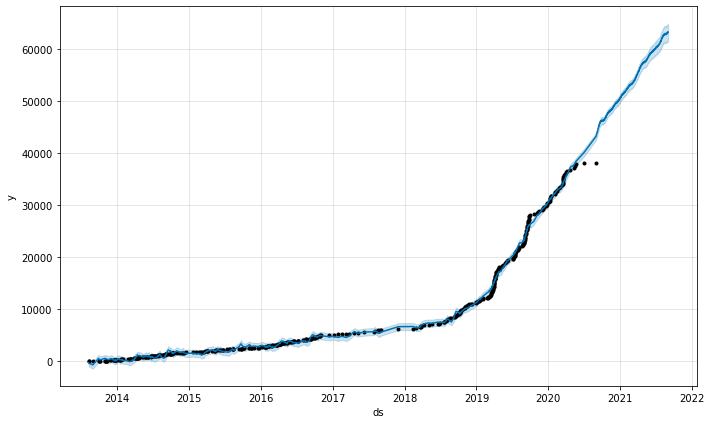

In [13]:
m.plot(forecast);

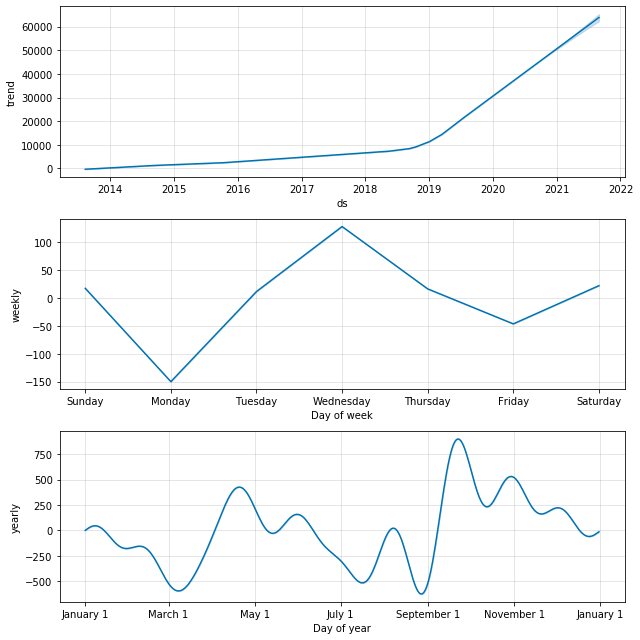

In [14]:
m.plot_components(forecast);

In [15]:
forecast["yhat"]

0       -334.440823
1       -383.750523
2       -754.154543
3        508.636154
4        289.432182
           ...     
787    62985.592715
788    63065.662851
789    63195.865152
790    63103.085819
791    63233.480073
Name: yhat, Length: 792, dtype: float64